<a href="https://colab.research.google.com/github/SrDlay/6th-fuzzy-task/blob/main/fuzzy_quinino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy
#https://pythonhosted.org/scikit-fuzzy/overview.html

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership functions

# Temperatura
temperatura= ctrl.Antecedent(np.arange(0, 101, 1), "Temperatura")
temperatura['alta']= fuzz.smf(temperatura.universe, 25, 100)
temperatura['baixa']= fuzz.zmf(temperatura.universe, 0, 75)

# Umidade
umidade= ctrl.Antecedent(np.arange(0, 101, 1), "Umidade")
umidade['alta']= fuzz.smf(umidade.universe, 0, 100)
umidade['baixa']= fuzz.zmf(umidade.universe, 0, 100)

# Proximidade
proximidadeAgua= ctrl.Antecedent(np.arange(0, 41, 1), "Massas de água")
proximidadeAgua['perto']= fuzz.zmf(proximidadeAgua.universe, 10, 40)
proximidadeAgua['longe']= fuzz.smf(proximidadeAgua.universe, 10, 40)

# Industrialização
industrializacao= ctrl.Antecedent(np.arange(0, 21, 1), "Industrialização")
industrializacao['baixa']= fuzz.zmf(industrializacao.universe, 10, 20)
industrializacao['alta']= fuzz.smf(industrializacao.universe, 10, 20)

# Dose de quinino
dose= ctrl.Consequent(np.arange(0, 101, 1), "Dose")
dose['muito baixa']= fuzz.zmf(dose.universe, 0, 10)
dose['baixa']= fuzz.zmf(dose.universe, 0, 50)
dose['alta']= fuzz.smf(dose.universe, 40, 100)

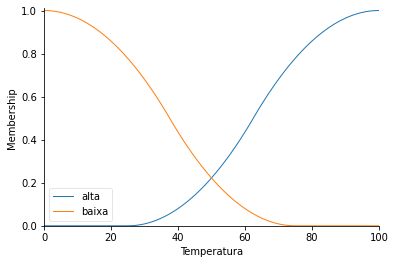

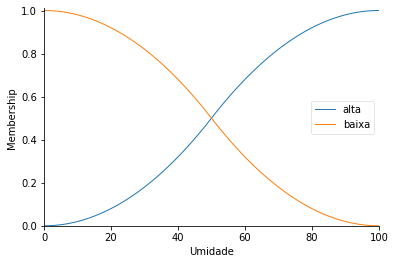

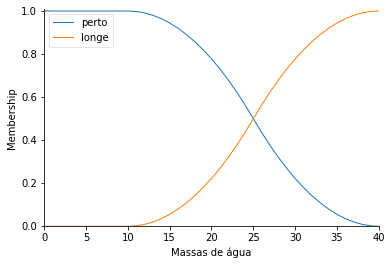

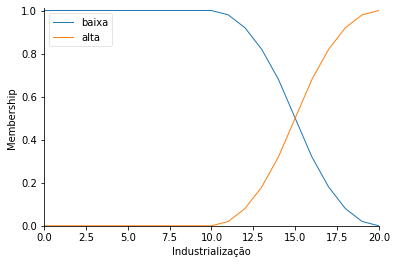

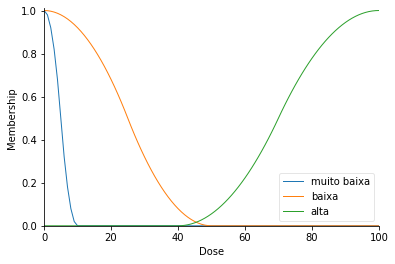

In [ ]:
temperatura.view()
umidade.view()
proximidadeAgua.view()
industrializacao.view()
dose.view()

In [ ]:
# Regra 1:

#     SE a temperatura for alta
#     E a umidade for alta
#     E a proximidade da água for perto
#     E a industrialização for baixa
#     ENTAO a dose de quinino será alta 

regra01 = ctrl.Rule(temperatura['alta'] & umidade['alta'] & proximidadeAgua['perto'] & industrializacao['baixa'], dose['alta'])

# Regra 2:

#     SE a industrialização for alta
#     ENTAO a dose de quinino será baixa

regra02 = ctrl.Rule(industrializacao['alta'], dose['baixa'])

# # Regra 3:

# #     SE a umidade for alta
# #     E a temperatura for alta
# #     E a industrialização for baixa
# #     OU a proximidade da água for perto
# #     ENTAO a dose de quinino será alta 

regra03= ctrl.Rule((umidade['alta'] & temperatura['alta'] & industrializacao['baixa']) | proximidadeAgua['perto'], dose['alta'])

# # Regra 4:

# #     SE a temperatura for baixa
# #     E a umidade for baixa
# #     ENTAO a dose de quinino será muito baixa

regra04= ctrl.Rule(temperatura['baixa'] & umidade['baixa'], dose['muito baixa'])


In [ ]:
dose_ctrl = ctrl.ControlSystem([regra01, regra02, regra03, regra04])

ctrl.accumulation_max
fuzzyQuinino = ctrl.ControlSystemSimulation(dose_ctrl)


fuzzyQuinino.input['Temperatura']= 80
fuzzyQuinino.input['Umidade']= 10
fuzzyQuinino.input['Massas de água']= 15
fuzzyQuinino.input['Industrialização']= 90 

fuzzyQuinino.compute()

51.33311209919978


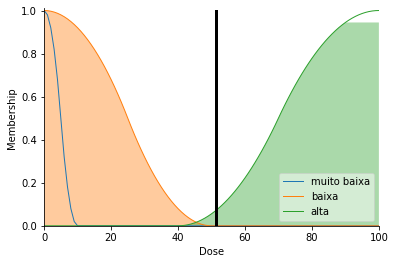

In [ ]:
print(fuzzyQuinino.output['Dose'])
dose.view(sim=fuzzyQuinino)